In [1]:
import math
import arrow

import ipynb 
import os.path
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from dotenv import load_dotenv
from networkx.algorithms import bipartite
from importlib import reload

from typing import List

load_dotenv(verbose=True)

True

In [2]:
# import functions from py file 

import function
reload(function)
from function import CB_data_cleaning, df_from_api_CB, extract_nodes, extract_data_from_column
from function import nx_dip_graph_from_pandas, plot_bipartite_graph, filter_dict
from function import extract_classes_company_tech, degree_bip, insert_data_classes

In [3]:
# import classes 

import classes
reload(classes)
from classes import Company, Investor, Technology

### Download data from API (not used!)

revenue_range	string

Estimated revenue range for organization
Field Type: enum
Searchable: Yes
Search Operators: blank, eq, includes, not_eq, not_includes
Possible values are:

    r_00000000 - Less than $1M
    r_00001000 - $1M to $10M
    r_00010000 - $10M to $50M
    r_00050000 - $50M to $100M
    r_00100000 - $100M to $500M
    r_00500000 - $500M to $1B
    r_01000000 - $1B to $10B
    r_10000000 - $10B+


In [4]:
"""num_lines = 1000

query = {
    "field_ids": [
        "name",
        "revenue_range",
        "description",
        "short_description",
        "location_identifiers",
        "categories",
        "category_groups",
        "facet_ids",
        "twitter",
        "rank_org" 
    ],
    "limit": num_lines,
    #"query": [
    #    {
    #      "type": "predicate",
    #      "field_id": "location_identifiers",
    #      "operator_id": "includes",
    #      "values": ["Switzerland"]
    #    },
    #]
}

df = df_from_api_CB (query, "organizations")"""

### CSV

In [5]:
list(df.columns)

['uuid',
 'properties.name',
 'properties.facet_ids',
 'properties.identifier.permalink',
 'properties.identifier.image_id',
 'properties.identifier.uuid',
 'properties.identifier.entity_def_id',
 'properties.identifier.value',
 'properties.description',
 'properties.category_groups',
 'properties.short_description',
 'properties.revenue_range',
 'properties.rank_org',
 'properties.categories',
 'properties.location_identifiers',
 'properties.twitter.value']

In [6]:
df.head()

uuid properties.name  \
0  1a410398-3a72-5882-99b8-6318cf594850        SoftBank   
1  2cc3a5de-2303-aa00-cd1a-50bd96420392          Klarna   
2  84c5275e-2a2f-e43a-1ff1-1a5f7c79975f          Apollo   
3  b2d5980b-bccb-a961-f0ac-6e4e46b30ede          Twilio   
4  8b03cd97-d8a0-2246-8d0d-980f092d414e          Square   

        properties.facet_ids properties.identifier.permalink  \
0  [investor, company, rank]                        softbank   
1  [investor, company, rank]                          klarna   
2  [investor, company, rank]    apollo-global-management-llc   
3  [investor, company, rank]                          twilio   
4  [investor, company, rank]                          square   

  properties.identifier.image_id            properties.identifier.uuid  \
0           liab4nlbn8ov1vzuwgqu  1a410398-3a72-5882-99b8-6318cf594850   
1           i7yjhhitbze4kylwmbfy  2cc3a5de-2303-aa00-cd1a-50bd96420392   
2           mwfin45rzaha8u5frhvh  84c5275e-2a2f-e43a-1ff1-1a5f7c79975f   
3           zy6ttel4bwjtojwcf3cu  b2d5980b-bccb-a961-f0ac-6e4e46b30ede   
4           vvtuyg7ay25uziwmpeac  8b03cd97-d8a0-2246-8d0d-980f092d414e   

  properties.identifier.entity_def_id properties.identifier.value  \
0                        organization                    SoftBank   
1                        organization                      Klarna   
2                        organization                      Apollo   
3                        organization                      Twilio   
4                        organization                      Square   

                              properties.description  \
0  SoftBank provides fixed-line, mobile telephony...   
1  Klarna is an eCommerce payment solutions platf...   
2  Apollo Global Management is an asset managemen...   
3  Twilio is the developer platform for communica...   
4  Square is a merchant services aggregator and m...   

                          properties.category_groups  \
0  [{'entity_def_id': 'category_group', 'permalin...   
1  [{'entity_def_id': 'category_group', 'permalin...   
2  [{'entity_def_id': 'category_group', 'permalin...   
3  [{'entity_def_id': 'category_group', 'permalin...   
4  [{'entity_def_id': 'category_group', 'permalin...   

                        properties.short_description properties.revenue_range  \
0  SoftBank provides fixed-line, mobile telephony...               r_10000000   
1  Klarna is an e-commerce payment solutions plat...               r_01000000   
2  Apollo Global Management is an asset managemen...               r_00500000   
3  Twilio is a cloud communication company that e...               r_00500000   
4  Square is a merchant services aggregator and m...               r_01000000   

   properties.rank_org                              properties.categories  \
0                    1  [{'entity_def_id': 'category', 'permalink': 'b...   
1                    2  [{'entity_def_id': 'category', 'permalink': 'e...   
2                    3  [{'entity_def_id': 'category', 'permalink': 'a...   
3                    4  [{'entity_def_id': 'category', 'permalink': 'e...   
4                    5  [{'entity_def_id': 'category', 'permalink': 'f...   

                     properties.location_identifiers  \
0  [{'permalink': 'tokyo-tokyo', 'uuid': '127ba62...   
1  [{'permalink': 'stockholm-stockholms-lan', 'uu...   
2  [{'permalink': 'new-york-new-york', 'uuid': 'd...   
3  [{'permalink': 'san-francisco-california', 'uu...   
4  [{'permalink': 'san-francisco-california', 'uu...   

             properties.twitter.value  
0  https://twitter.com/softbank_group  
1           http://twitter.com/klarna  
2    https://twitter.com/apolloglobal  
3           http://twitter.com/twilio  
4           http://twitter.com/Square

In [7]:
df.loc[0]

uuid                                                1a410398-3a72-5882-99b8-6318cf594850
properties.name                                                                 SoftBank
properties.facet_ids                                           [investor, company, rank]
properties.identifier.permalink                                                 softbank
properties.identifier.image_id                                      liab4nlbn8ov1vzuwgqu
properties.identifier.uuid                          1a410398-3a72-5882-99b8-6318cf594850
properties.identifier.entity_def_id                                         organization
properties.identifier.value                                                     SoftBank
properties.description                 SoftBank provides fixed-line, mobile telephony...
properties.category_groups             [{'entity_def_id': 'category_group', 'permalin...
properties.short_description           SoftBank provides fixed-line, mobile telephony...
properties.revenue_ra

In [8]:
df.loc[0]["properties.description"]

'SoftBank provides fixed-line, mobile telephony, internet, telecommunications, and digital television products. It is a multinational telecommunications and internet corporation focused on broadband, fixed-line telecommunications, e-commerce, internet, technology services, finance, media and marketing, and other businesses. The company operates through four major segments.\n\nThe mobile communications segment provides mobile communications services; produces and distributes online games for smartphones and other devices; offers mobile broadband services; provides supply chain solutions, handset protection, and insurance, buy-back and trade-in services, omni-channel solutions, and financial services; and sells mobile devices such as iPhones, iPads, and SoftBank smartphones. The sprint segment offers mobile and fixed-line voice and data transmission services for individual consumers, businesses, government subscribers, and resellers in Puerto Rico and the U.S., and sells mobile devices a

In [9]:
df.loc[0]["properties.short_description"]

'SoftBank provides fixed-line, mobile telephony, internet, telecommunications, and digital television products.'

In [10]:
"""num_lines = 20

query = {
    "field_ids": [
        "name",
        "short_description",
        "location_identifiers",
        "categories",
        "category_groups",
        "facet_ids",
        "twitter",
        "rank_org" 
    ],
    "limit": num_lines,
}

df = df_from_api_CB (query, "organizations")"""

'num_lines = 20\n\nquery = {\n    "field_ids": [\n        "name",\n        "short_description",\n        "location_identifiers",\n        "categories",\n        "category_groups",\n        "facet_ids",\n        "twitter",\n        "rank_org" \n    ],\n    "limit": num_lines,\n}\n\ndf = df_from_api_CB (query, "organizations")'

Organization download

### Data Cleaning

In [11]:
to_drop = [
    'properties.identifier.image_id',
    'properties.identifier.uuid',
    'properties.identifier.entity_def_id',   
    'properties.short_description',
    'properties.identifier.permalink',
    'properties.short_description',
    'properties.twitter.value',
    'properties.categories'
]

to_rename = {
    'properties.name': 'name', 
    'properties.category_groups':'category_groups',
    'properties.location_identifiers': 'location_comp',
    'properties.rank_org': 'rank_company'
}

to_check_double = {
    'name': 'properties.identifier.value'
    
}

drop_if_nan = [] 

sort_by = "rank_company"

In [12]:
len(drop_if_nan)

0

In [13]:
df = CB_data_cleaning(df, to_drop, to_rename, to_check_double, drop_if_nan, sort_by)

In [14]:
df = df.dropna(subset=['location_comp'])

### Extract categories:

In [15]:
df["category_groups"]

0      [{'entity_def_id': 'category_group', 'permalin...
1      [{'entity_def_id': 'category_group', 'permalin...
2      [{'entity_def_id': 'category_group', 'permalin...
3      [{'entity_def_id': 'category_group', 'permalin...
4      [{'entity_def_id': 'category_group', 'permalin...
                             ...                        
995    [{'entity_def_id': 'category_group', 'permalin...
996    [{'entity_def_id': 'category_group', 'permalin...
997    [{'entity_def_id': 'category_group', 'permalin...
998    [{'entity_def_id': 'category_group', 'permalin...
999    [{'entity_def_id': 'category_group', 'permalin...
Name: category_groups, Length: 999, dtype: object

In [16]:
df["category_groups"] = extract_data_from_column(df["category_groups"], 'value')

In [17]:
df.head()

uuid      name       properties.facet_ids  \
0  1a410398-3a72-5882-99b8-6318cf594850  SoftBank  [investor, company, rank]   
1  2cc3a5de-2303-aa00-cd1a-50bd96420392    Klarna  [investor, company, rank]   
2  84c5275e-2a2f-e43a-1ff1-1a5f7c79975f    Apollo  [investor, company, rank]   
3  b2d5980b-bccb-a961-f0ac-6e4e46b30ede    Twilio  [investor, company, rank]   
4  8b03cd97-d8a0-2246-8d0d-980f092d414e    Square  [investor, company, rank]   

                              properties.description  \
0  SoftBank provides fixed-line, mobile telephony...   
1  Klarna is an eCommerce payment solutions platf...   
2  Apollo Global Management is an asset managemen...   
3  Twilio is the developer platform for communica...   
4  Square is a merchant services aggregator and m...   

                                     category_groups properties.revenue_range  \
0  [Financial Services, Hardware, Internet Servic...               r_10000000   
1  [Commerce and Shopping, Financial Services, Pa...               r_01000000   
2  [Financial Services, Lending and Investments, ...               r_00500000   
3  [Apps, Information Technology, Internet Servic...               r_00500000   
4  [Financial Services, Hardware, Mobile, Payment...               r_01000000   

   rank_company                                      location_comp  
0             1  [{'permalink': 'tokyo-tokyo', 'uuid': '127ba62...  
1             2  [{'permalink': 'stockholm-stockholms-lan', 'uu...  
2             3  [{'permalink': 'new-york-new-york', 'uuid': 'd...  
3             4  [{'permalink': 'san-francisco-california', 'uu...  
4             5  [{'permalink': 'san-francisco-california', 'uu...

In [18]:
df.columns

Index(['uuid', 'name', 'properties.facet_ids', 'properties.description',
       'category_groups', 'properties.revenue_range', 'rank_company',
       'location_comp'],
      dtype='object')

### Create Companies and Technologies classes

#### Ranking

I personally appreciate the ranking that you provide for each company. However, I did not quite understand what's the magic behind it. Is there any chance to get some more insight/details, also considering that we do have an NDA in place?

- Crunchbase rank uses Crunchbase’s intelligent algorithms to score and rank entities (e.g. Company, People, Investors, etc.).
- The algorithms take into account many different variables; ranging from funding events, the entity’s strength of relationships with other entities in the Crunchbase ecosystem, the level of engagement from our website, news articles, and acquisitions.

    - A company’s Rank is fluid and subject to rising and decaying over time with time-sensitive events. Events such as product launches, funding events, leadership changes, and news affect a company’s Crunchbase Rank.


- The Crunchbase rank shows where an entity falls in the Crunchbase database relative to all other entities in that entity type (i.e. if searching for companies, you will see where a specific company ranks relative to all other companies). An entity with a Crunchbase Rank of 1 has the highest rank relative to all other entities of that type.

I would also suggest leveraging our Trend Score - 7 Day, 30 Day, 90 Day (e.g. Company, People, Investors, etc.)

- While Rank shows context, Crunchbase Trend Score demonstrates activity. A company’s rank will change based on activity (fundraising, news, etc.) and Trend Score is an indicator of how much their rank is changing at any given time.
- Crunchbase Trend Score tracks the fluctuations in Rank. As a company’s rank changes, so do its Trend Score.
- Trend Score measures the rate of a company’s activity on a 20-point (+10 <-> -10) scale. Scores closer to +10 mean it’s moving up in rank much faster compared to their peers. Scores closer to -10 mean it’s moving down.
- For example, a company that announces its first funding round will likely experience a jump in its Rank, pushing its Trend Score up as its page views, article counts, funding amount, team members, etc., begin to increase.


In [19]:
[dict_companies, dict_tech, B] = extract_classes_company_tech(df)

In [37]:
print(f"We have {len(dict_companies)} companies and {len(dict_tech)} technologies")

We have 999 companies and 47 technologies


### Plots

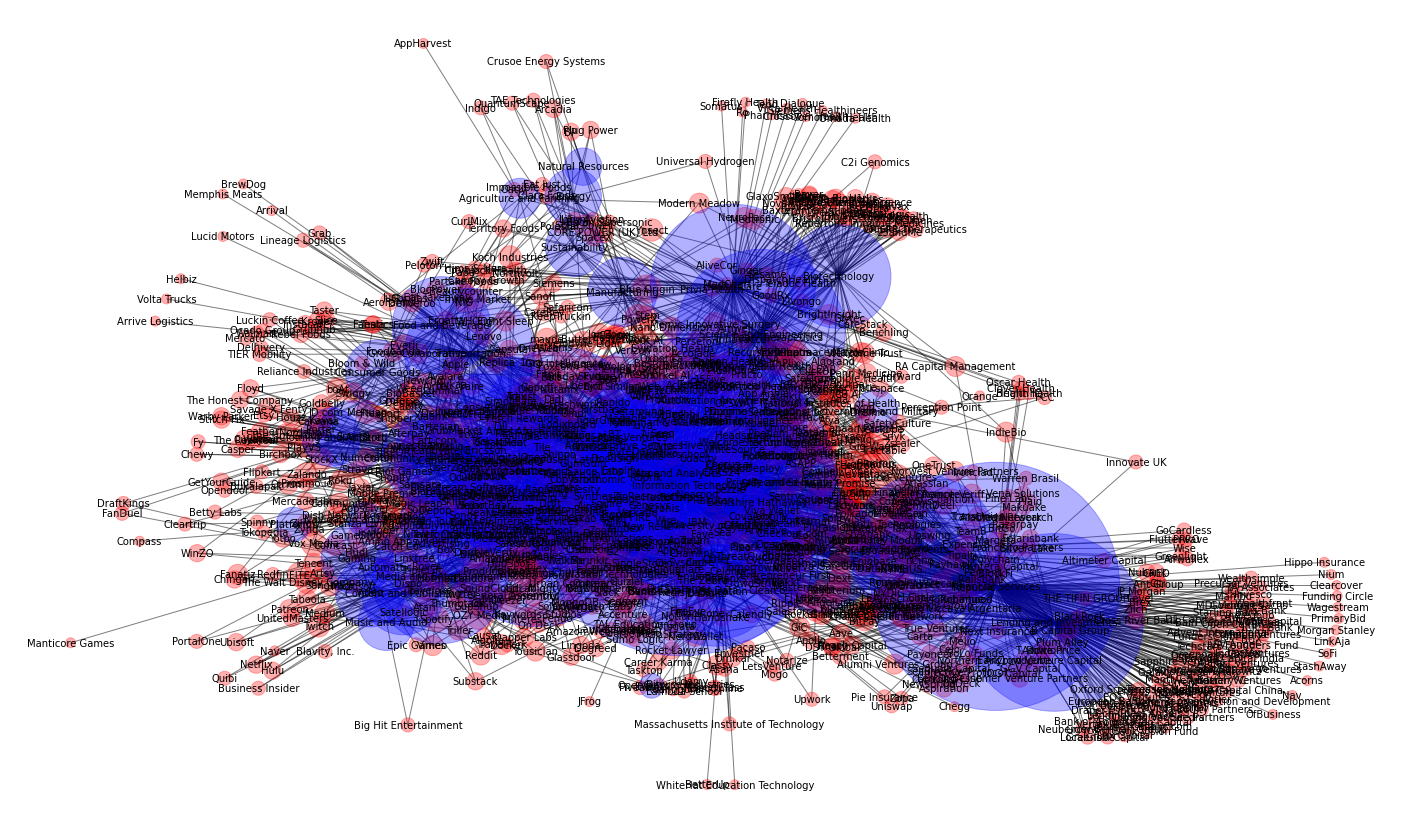

In [38]:
plot_bipartite_graph(B, small_degree=True)

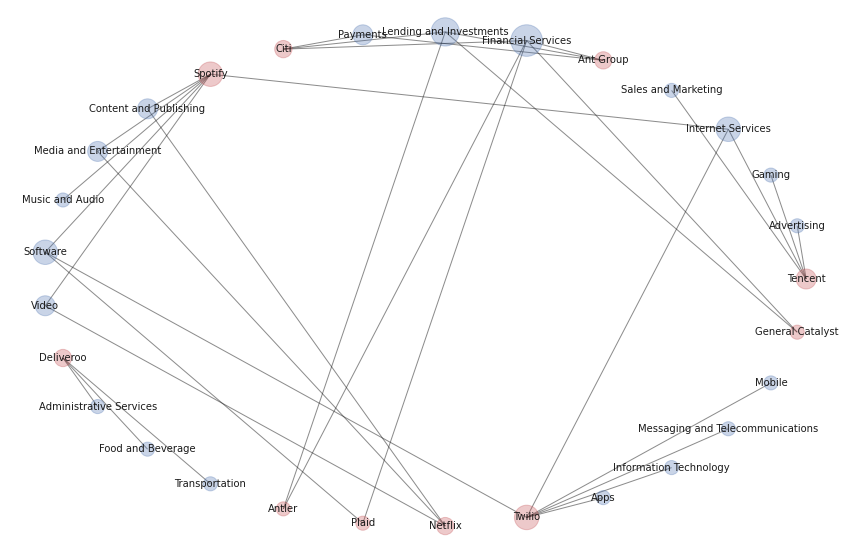

In [103]:
plot_bipartite_graph(B, small_degree=True, circular=True)

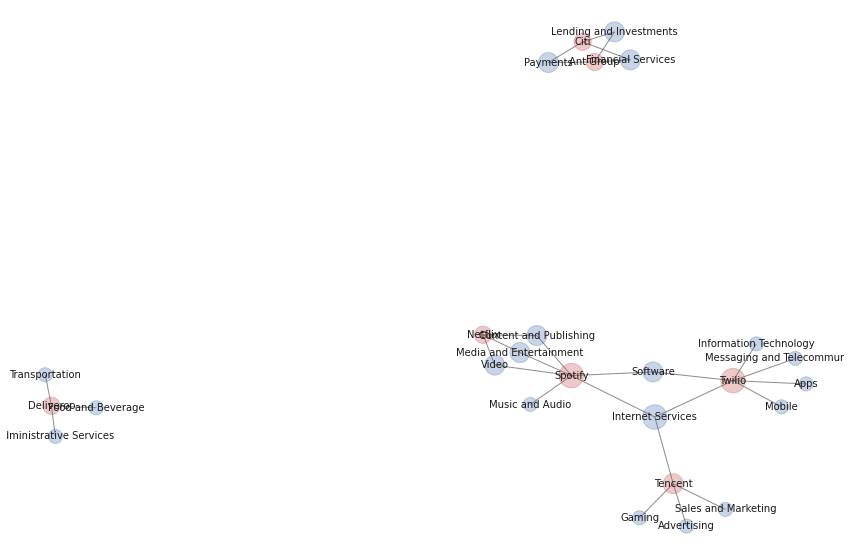

In [104]:
plot_bipartite_graph(B, small_degree=False)

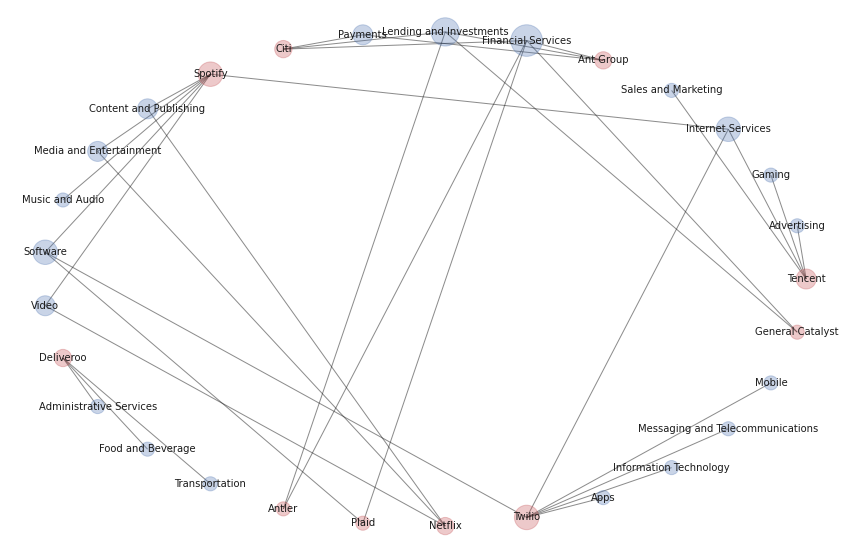

In [105]:
plot_bipartite_graph(B, small_degree=True, circular=True)
plt.savefig('')

In [106]:
[company_degree, tech_degree] = degree_bip(B)

In [107]:
print(f"We have {len(company_degree)} companies and {len(tech_degree)} technologies")

We have 10 companies and 19 technologies


In [108]:
# sort by value
company_degree_sorted = dict(sorted(company_degree.items(), key=lambda item: item[1], reverse=True))
tech_degree_sorted = dict(sorted(tech_degree.items(), key=lambda item: item[1], reverse=True))

# only maximum 
num_max = 10


# check we don't go out of range
if len(company_degree)<num_max or len(tech_degree)<num_max:
    minn = min(len(company_degree), len(tech_degree))
    num_max = minn-1

def limit_value(x, num_max_perc):
    return list(x.values())[num_max_perc]

company_degree_max = {k: company_degree_sorted[k] for k in list(company_degree_sorted.keys())[:num_max]}
tech_degree_max = {k: tech_degree_sorted[k] for k in list(tech_degree_sorted.keys())[:num_max]}


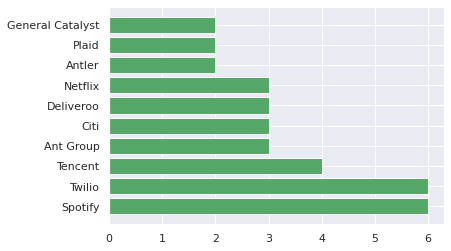

In [109]:
plt.barh(list(company_degree_max.keys()), company_degree_max.values(), color='g')
plt.grid(True)
plt.show()

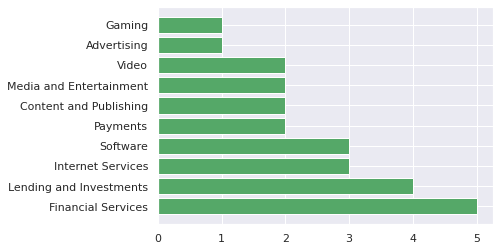

In [110]:
plt.barh(list(tech_degree_max.keys()), tech_degree_max.values(), color='g')
plt.grid(True)
plt.show()

In [111]:
# companies' degree 
dict_companies = insert_data_classes(dict_companies, dict(company_degree), 'degree')

In [112]:
# technologies' degree
dict_tech = insert_data_classes(dict_tech, dict(tech_degree), 'degree')

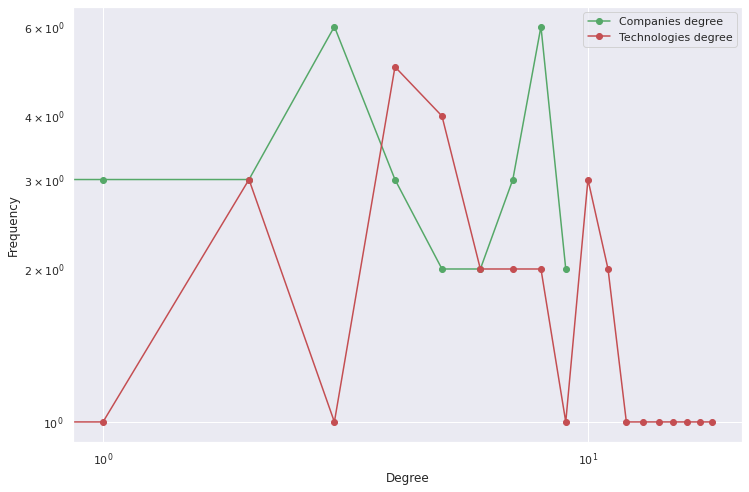

In [113]:
a = list(company_degree.values())
b = list(tech_degree.values())
degrees_a = range(len(a))
degrees_b = range(len(b))

m=0
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees_a[m:], a,'go-', label='Companies degree') 
plt.loglog(degrees_b[m:], b,'ro-', label='Technologies degree') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

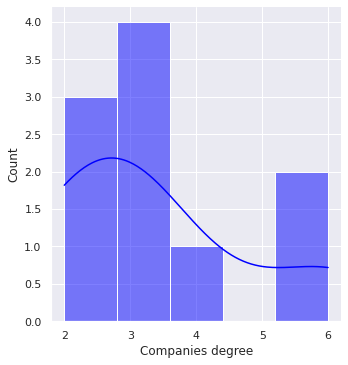

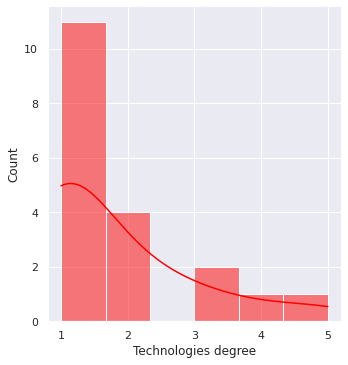

In [114]:
sns.set(style="darkgrid")
sns.displot(a, color="blue", label="Companies degree", kde=True)
plt.xlabel("Companies degree")
sns.displot(b, color="red", label="Technologies degree", kde=True)
plt.xlabel("Technologies degree")
plt.show()

### Rank

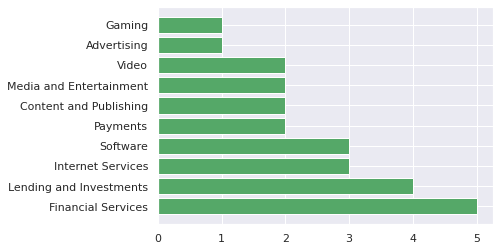

In [115]:
from networkx.algorithms.bipartite.matrix import biadjacency_matrix

In [116]:
set0 = extract_nodes(B, 0)
set1 = extract_nodes(B, 1)

# adjacency matrix of bipartite graph
adj_matrix = biadjacency_matrix(B, set0, set1)

In [117]:
adj_matrix_dense = adj_matrix.todense()

**Representation**

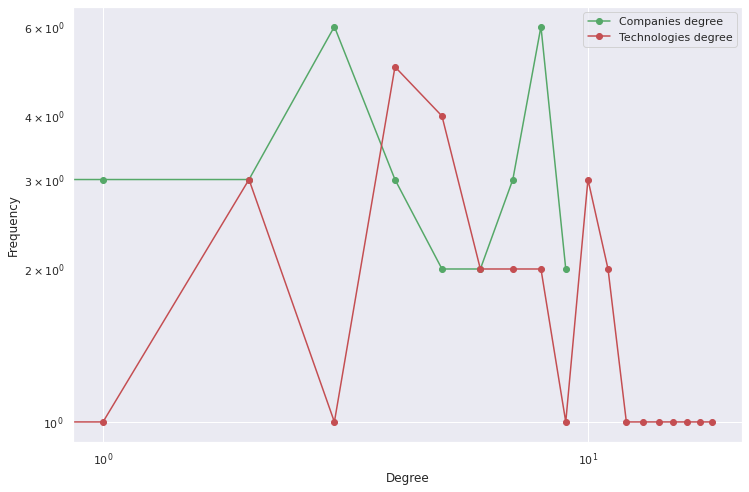

In [118]:
a = np.squeeze(np.asarray(adj_matrix_dense))
a.sum(axis=1)

In [119]:
company_degree

{'Tencent': 4,
 'Ant Group': 3,
 'Citi': 3,
 'Spotify': 6,
 'Deliveroo': 3,
 'Antler': 2,
 'Plaid': 2,
 'Netflix': 3,
 'Twilio': 6,
 'General Catalyst': 2}

In [120]:
tech_degree

{'Advertising': 1,
 'Gaming': 1,
 'Internet Services': 3,
 'Sales and Marketing': 1,
 'Financial Services': 5,
 'Lending and Investments': 4,
 'Payments': 2,
 'Content and Publishing': 2,
 'Media and Entertainment': 2,
 'Music and Audio': 1,
 'Software': 3,
 'Video': 2,
 'Administrative Services': 1,
 'Food and Beverage': 1,
 'Transportation': 1,
 'Apps': 1,
 'Information Technology': 1,
 'Messaging and Telecommunications': 1,
 'Mobile': 1}

In [121]:
# import functions from py file 

import functions_method_of_reflections
reload(functions_method_of_reflections)
from functions_method_of_reflections import zero_order_score, Gct_beta, Gtc_alpha, make_G_hat, next_order_score, generator_order_w
from functions_method_of_reflections import M_test_triangular, w_stream, find_convergence, rank_df_class

In [122]:
# M is the array version of the matrix adj_matrix_dense:
M = np.squeeze(np.asarray(adj_matrix_dense))

### Triangularize matrix

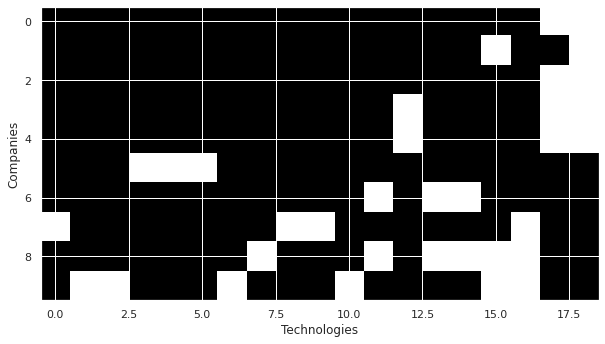

In [123]:
M_test_triangular(adj_matrix_dense)

### Zero order score

These are an $w_{c}$ editor-vector which is the sums of articles edited by each editor. Or the article-vector $w_{p}$, which is the sum of editors contributing to each article.

\begin{cases}
 w_{c}^{(0)} = \sum_{p=1}^{N_{p}} M \equiv k_c\\[7pt]
 w_{p}^{(0)} = \sum_{c=1}^{N_{c}} M \equiv k_p
\end{cases}

In [124]:
k_c, k_t = zero_order_score(M)

array([4, 3, 3, 6, 3, 2, 2, 3, 6, 2])

### G - transition probability function

Depending on $\alpha$ and $\beta$ we non-linearly weight based on the Zeroth order iterations. 

\begin{cases}
G_{ct}(\beta) = \frac{M_{ct} k_{c}^{-\beta}}{\sum_{c' = 1}^{N_c} M_{c't} k_{c'}^{-\beta}}\\[10pt]
G_{tc}(\alpha) = \frac{M_{ct} k_{t}^{-\alpha}}{\sum_{t' = 1}^{N_t} M_{ct'} k_{t'}^{-\alpha}}.\\\end{cases}

### Higher cases

The first order $w^{1}_c$ is the sum of the articles touched, but weighted by the Zeroth order article-vector (and the $G$ term). So if you've edited better articles that counts. And $w^{1}_c$ is the sum of editors touching, but weighted by the Zeroth order editor-vector (and $G$). So if you're touched by better editors that's also being considered. 

Beyond the first order interpretation for the higher orders is difficult.

\begin{cases}
w^{(n+1)}_c (\alpha,\beta) = \sum_{t=1}^{N_p}  G_{ct}(\beta) \,w^{(n)}_t (\alpha,\beta)\\[7pt]
w^{(n+1)}_t (\alpha,\beta) = \sum_{c=1}^{N_c}  G_{tc}(\alpha) \, w^{(n)}_c (\alpha,\beta)\\
\end{cases}

#### Companies

In [125]:
convergence_comp = find_convergence(M, alpha=0.5, beta=0.5, fit_or_ubiq='fitness', do_plot=True)

In [126]:
df_final_companies, dict_companies = rank_df_class(convergence_comp, dict_companies)

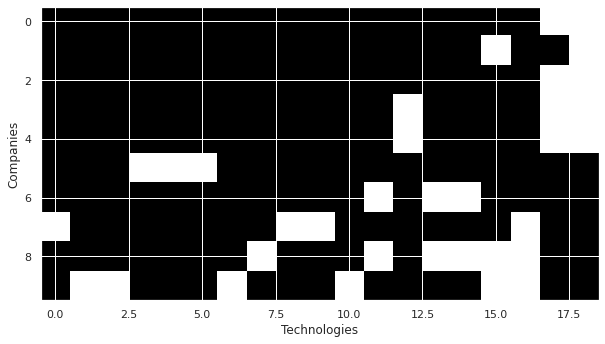

In [127]:
# relative rank
df_final_companies['final_rank_normlized'] = df_final_companies['final_rank']/np.max(list(df_final_companies['final_rank']))*10
n = np.max(df_final_companies['rank_CB']) + 1
df_final_companies['rank_CB_normlized'] = n - df_final_companies['rank_CB']

df_final_companies['TeckRank_int'] = df_final_companies.index + 1.0

In [128]:
df_final_companies

initial_position final_configuration degree final_rank  rank_CB  \
0                0              Antler      2       2.18      6.0   
1                1    General Catalyst      2       2.18     10.0   
2                2               Plaid      2      2.472      7.0   
3                3           Ant Group      3       2.78      2.0   
4                4                Citi      3       2.78      3.0   
5                5           Deliveroo      3        3.0      5.0   
6                6             Netflix      3      3.515      8.0   
7                7             Tencent      4      4.139      1.0   
8                8             Spotify      6      5.219      4.0   
9                9              Twilio      6      5.734      9.0   

  final_rank_normlized  rank_CB_normlized  TeckRank_int  
0             3.801884                5.0           1.0  
1             3.801884                1.0           2.0  
2             4.311127                4.0           3.0  
3             4.848273                9.0           4.0  
4             4.848273                8.0           5.0  
5              5.23195                6.0           6.0  
6             6.130101                3.0           7.0  
7             7.218347               10.0           8.0  
8             9.101849                7.0           9.0  
9                 10.0                2.0          10.0

In [130]:
df_spearman = df_final_companies[["TeckRank_int", "rank_CB_normlized"]]
df_spearman = df_spearman.astype(float)
df_spearman["name"] = df_final_companies['final_configuration']
df_spearman.set_index("name")

TeckRank_int  rank_CB_normlized
name                                             
Antler                     1.0                5.0
General Catalyst           2.0                1.0
Plaid                      3.0                4.0
Ant Group                  4.0                9.0
Citi                       5.0                8.0
Deliveroo                  6.0                6.0
Netflix                    7.0                3.0
Tencent                    8.0               10.0
Spotify                    9.0                7.0
Twilio                    10.0                2.0

In [131]:
df_spearman

TeckRank_int  rank_CB_normlized              name
0           1.0                5.0            Antler
1           2.0                1.0  General Catalyst
2           3.0                4.0             Plaid
3           4.0                9.0         Ant Group
4           5.0                8.0              Citi
5           6.0                6.0         Deliveroo
6           7.0                3.0           Netflix
7           8.0               10.0           Tencent
8           9.0                7.0           Spotify
9          10.0                2.0            Twilio

**Sperman correlation**

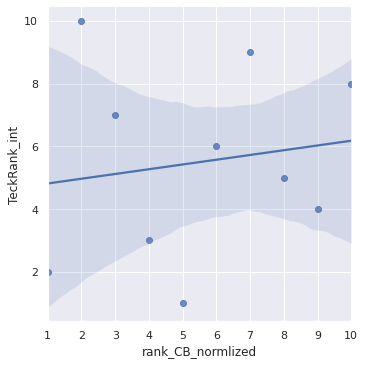

In [134]:
sns.lmplot(x="rank_CB_normlized", y="TeckRank_int", data=df_spearman)
plt.show()

In [135]:
df_spearman.corr(method='spearman')

TeckRank_int  rank_CB_normlized
TeckRank_int           1.000000           0.151515
rank_CB_normlized      0.151515           1.000000

#### Technologies

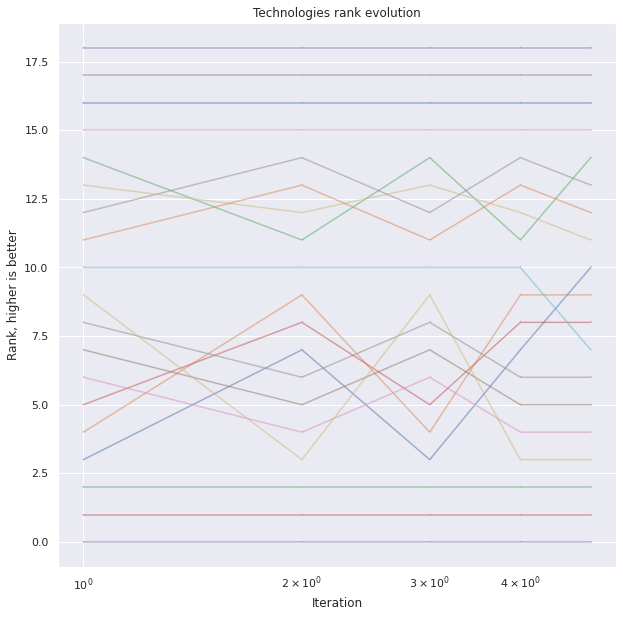

In [138]:
convergence_tech = find_convergence(M, alpha=0.5, beta=0.5, fit_or_ubiq='ubiquity', do_plot=True)

In [139]:
df_final_tech, dict_tech = rank_df_class(convergence_tech, dict_tech)

In [140]:
df_final_tech

initial_position               final_configuration degree final_rank
0                 0                    Transportation      1        1.0
1                 1                 Food and Beverage      1        1.0
2                 2           Administrative Services      1        1.0
3                 9                            Mobile      1      1.164
4                 6            Information Technology      1      1.164
5                 7                              Apps      1      1.164
6                 8  Messaging and Telecommunications      1      1.164
7                10                   Music and Audio      1      1.189
8                 5               Sales and Marketing      1      1.194
9                 4                            Gaming      1      1.194
10                3                       Advertising      1      1.194
11               13           Media and Entertainment      2      2.032
12               11                             Video      2      2.032
13               12            Content and Publishing      2      2.032
14               14                 Internet Services      3      2.048
15               15                          Payments      2      2.495
16               16                          Software      3      2.578
17               17           Lending and Investments      4      3.914
18               18                Financial Services      5      4.445

### Save dict in JSON

In [70]:
def dict_to_json(dictionary, name):
    
    with open(name, 'w') as fp:
        json.dump(dictionary, fp)


We also know from Caldarelli et al. that there is an analytic formulation to the recursive procedure. So if you want to save some (a lot) processing and just know the end result we can use:

## Analytic solution

\begin{cases}
w^{*}_e (\alpha,\beta) = (\sum_{a=1}^{N_a} M_{ea}k_{a}^{-\alpha})k_{e}^{-\beta} \\
w^{*}_a (\alpha,\beta) = (\sum_{e=1}^{N_e}  M_{ea}k_{e}^{-\beta})k_{a}^{-\alpha}\\
\end{cases}

And again in python:

In [49]:
def w_star_analytic(M, alpha, beta, w_star_type):
    k_c  = M.sum(axis=1) #aka k_c summing over the rows
    k_p = M.sum(axis=0) #aka k_p summering over the columns
    
    A = 1
    B = 1
    
    def Gcp_denominateur(M, p, k_c, beta):
        M_p = M[:,p]
        k_c_beta = k_c ** (-1 * beta)
        return np.dot(M_p, k_c_beta)
    
    def Gpc_denominateur(M, c, k_p, alpha):
        M_c = M[c,:]
        k_p_alpha = k_p ** (-1 * alpha)
        return np.dot(M_c, k_p_alpha)
    
    if w_star_type == 'w_star_c':
        w_star_c = np.zeros(shape=M.shape[0])

        for c in range(M.shape[0]):
            summand = Gpc_denominateur(M, c, k_p, alpha)
            k_beta = (k_c[c] ** (-1 * beta))
            w_star_c[c] = A * summand * k_beta

        return w_star_c
    
    elif w_star_type == 'w_star_p':
        w_star_p = np.zeros(shape=M.shape[1])
    
        for p in range(M.shape[1]):
            summand = Gcp_denominateur(M, p, k_c, beta)
            k_alpha = (k_p[p] ** (-1 * alpha))
            w_star_p[p] = B * summand * k_alpha
    
        return w_star_p

In [50]:
w_scores = w_star_analytic(M, alpha=0.5, beta=0.5, w_star_type='w_star_c')
i = 0
dict_comp_rank = {}

for c in dict_companies.keys():
    c_rank = w_scores[i]
    dict_comp_rank[c] = c_rank
    i = i+1
    
dict_comp_rank

{'ConsenSys': 0.96334278778213,
 'Wire': 1.5577672834267198,
 'Polkadot': 0.7337032968486359,
 'Novartis': 0.9248655564138276,
 'Roche': 0.9248655564138276,
 'Acronis': 1.1233812551806175,
 'VectivBio': 0.9248655564138276,
 'Partners Group': 0.658248290463863,
 'OneSoil': 1.5251701874244021,
 'Verve Ventures': 0.9457057690291277,
 'DFINITY': 0.7723020403066336,
 'CasperLabs': 0.7723020403066336,
 'Ethereum Foundation': 0.806926601551999,
 'Alpian': 0.7556753688012572,
 'Scandit': 1.4055970315553523,
 'Sportradar': 1.3729184286152438,
 'ABB': 1.9789799246052224,
 'Liquity': 0.5172612419124245,
 'Cardano Foundation': 0.9690190153791397,
 'Enso Finance': 0.7987716336934698}

In [51]:
"""w_ranks = {name: w_scores[pos] for name, pos in  }
#sort
w_ranks_sorted = sorted(w_ranks.iteritems(), key=operator.itemgetter(1))

#or use pandas
w_scores_df = pd.DataFrame.from_dict(w_ranks, orient='index')
w_scores_df.columns = ['w_score']
w_scores_df.sort(columns=['w_score'], ascending=False).head()"""

"w_ranks = {name: w_scores[pos] for name, pos in  }\n#sort\nw_ranks_sorted = sorted(w_ranks.iteritems(), key=operator.itemgetter(1))\n\n#or use pandas\nw_scores_df = pd.DataFrame.from_dict(w_ranks, orient='index')\nw_scores_df.columns = ['w_score']\nw_scores_df.sort(columns=['w_score'], ascending=False).head()"

In [52]:
w_scores

array([0.96334279, 1.55776728, 0.7337033 , 0.92486556, 0.92486556,
       1.12338126, 0.92486556, 0.65824829, 1.52517019, 0.94570577,
       0.77230204, 0.77230204, 0.8069266 , 0.75567537, 1.40559703,
       1.37291843, 1.97897992, 0.51726124, 0.96901902, 0.79877163])

In [53]:
company_degree.keys()

dict_keys(['ConsenSys', 'Wire', 'Polkadot', 'Novartis', 'Roche', 'Acronis', 'VectivBio', 'Partners Group', 'OneSoil', 'Verve Ventures', 'DFINITY', 'CasperLabs', 'Ethereum Foundation', 'Alpian', 'Scandit', 'Sportradar', 'ABB', 'Liquity', 'Cardano Foundation', 'Enso Finance'])

In [54]:
extract_nodes(B, 0)

['ConsenSys',
 'Wire',
 'Polkadot',
 'Novartis',
 'Roche',
 'Acronis',
 'VectivBio',
 'Partners Group',
 'OneSoil',
 'Verve Ventures',
 'DFINITY',
 'CasperLabs',
 'Ethereum Foundation',
 'Alpian',
 'Scandit',
 'Sportradar',
 'ABB',
 'Liquity',
 'Cardano Foundation',
 'Enso Finance']

# Higher numbers of rows:

In [141]:
num_lines = 1000

query = {
    "field_ids": [
        "name",
        "short_description",
        "location_identifiers",
        "categories",
        "category_groups",
        "facet_ids",
        "twitter",
        "rank_org" 
    ],
    "limit": num_lines,
}

df = df_from_api_CB (query, "organizations")

Organization download

### Data Cleaning

In [142]:
to_drop = [
    'properties.identifier.image_id',
    'properties.identifier.uuid',
    'properties.identifier.entity_def_id',   
    'properties.short_description',
    'properties.identifier.permalink',
    'properties.short_description',
    'properties.twitter.value',
    'properties.categories'
]

to_rename = {
    'properties.name': 'name', 
    'properties.category_groups':'category_groups',
    'properties.location_identifiers': 'location_comp',
    'properties.rank_org': 'rank_company'
}

to_check_double = {
    'name': 'properties.identifier.value'
    
}

drop_if_nan=[]

sort_by = "rank_company"

In [144]:
df = CB_data_cleaning(df, to_drop, to_rename, to_check_double, drop_if_nan, sort_by)

In [145]:
df["category_groups"] = extract_data_from_column(df["category_groups"], 'value')

In [146]:
[dict_companies, dict_tech, B] = extract_classes_company_tech(df)

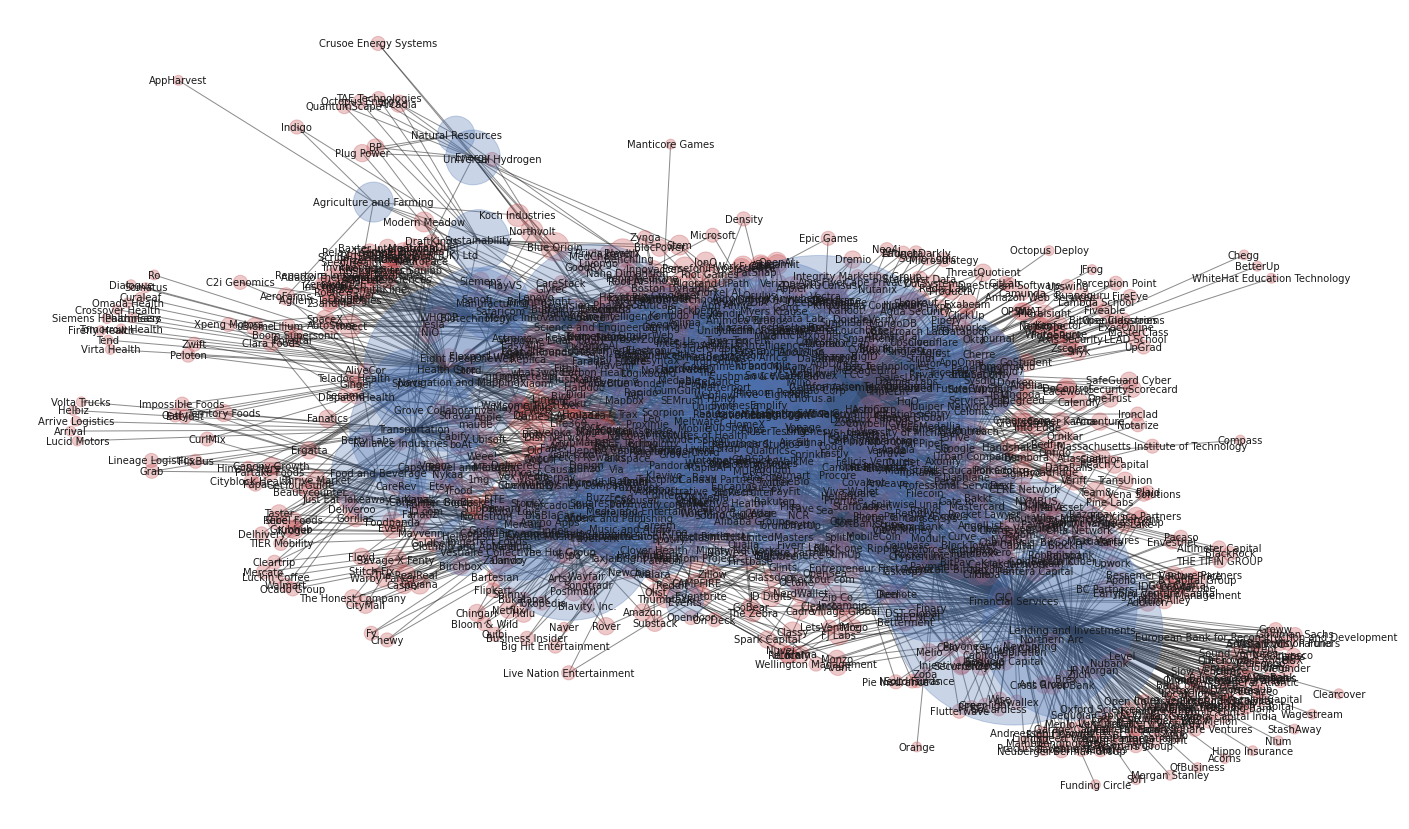

In [147]:
plot_bipartite_graph(B, small_degree=True)

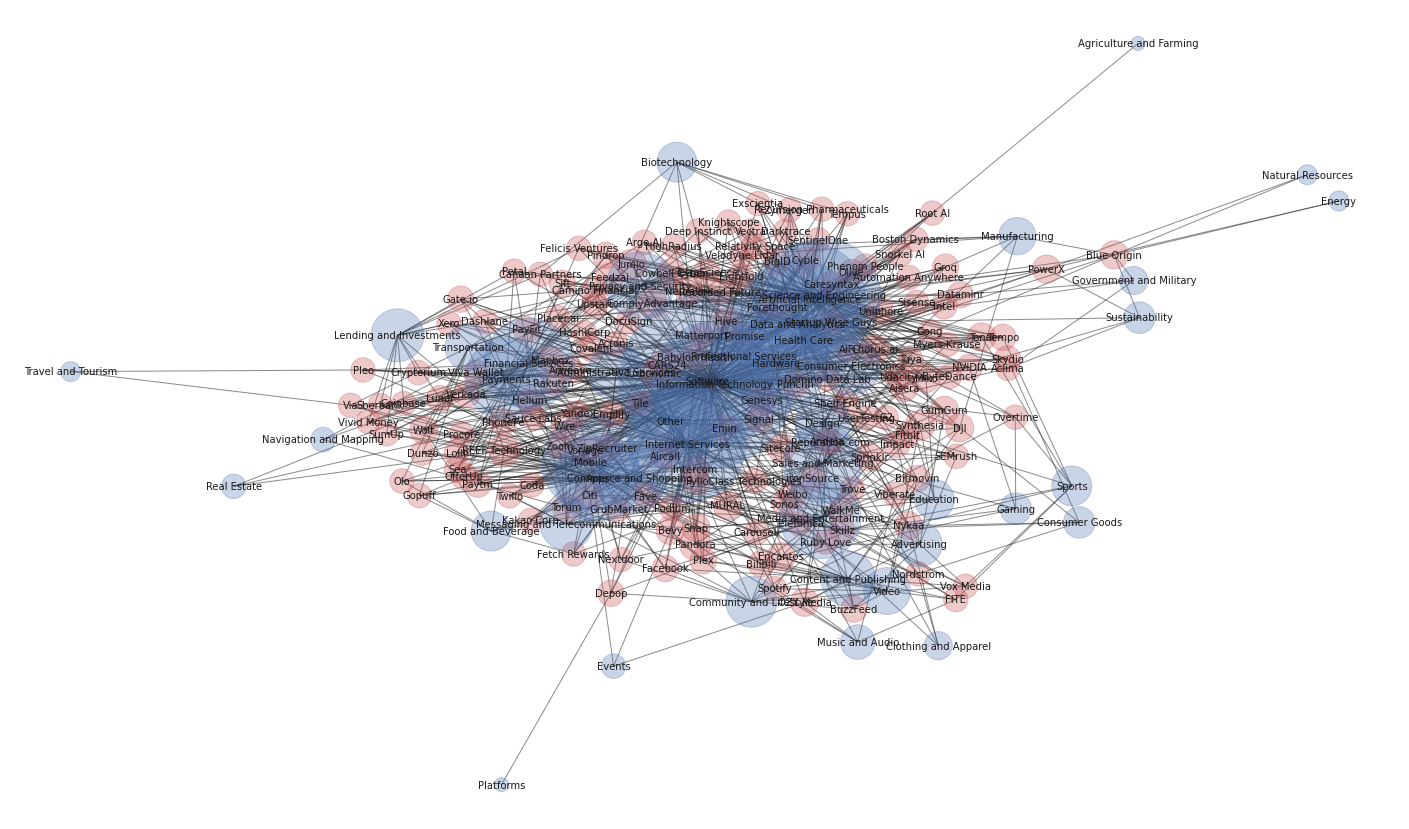

In [148]:
plot_bipartite_graph(B, small_degree=False)

In [149]:
[company_degree, tech_degree] = degree_bip(B)

In [150]:
# companies' degree 
dict_companies = insert_data_classes(dict_companies, dict(company_degree), 'degree')

In [151]:
# technologies' degree
dict_tech = insert_data_classes(dict_tech, dict(tech_degree), 'degree')

In [152]:
from networkx.algorithms.bipartite.matrix import biadjacency_matrix

In [153]:
set0 = extract_nodes(B, 0)
set1 = extract_nodes(B, 1)

# adjacency matrix of bipartite graph
adj_matrix = biadjacency_matrix(B, set0, set1)

In [154]:
adj_matrix_dense = adj_matrix.todense()

In [155]:
# M is the array version of the matrix adj_matrix_dense:
M = np.squeeze(np.asarray(adj_matrix_dense))

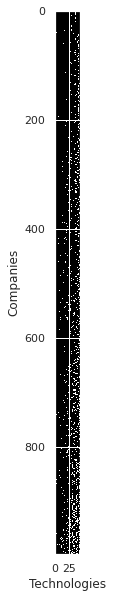

In [156]:
M_test_triangular(adj_matrix_dense)

#### Companies

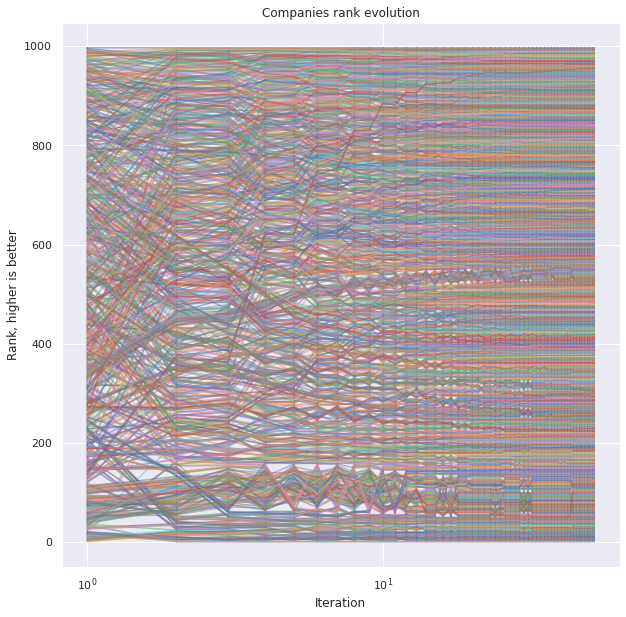

In [158]:
convergence_comp = find_convergence(M, alpha=0.5, beta=0.5, fit_or_ubiq='fitness', do_plot=True)

plt.savefig('plots/company_rank_evolution.pdf')

In [159]:
convergence_comp['iteration']

53

In [160]:
df_final_companies, dict_companies = rank_df_class(convergence_comp, dict_companies)

In [161]:
# relative rank
df_final_companies['final_rank_normlized'] = df_final_companies['final_rank']/np.max(list(df_final_companies['final_rank']))*10
n = np.max(df_final_companies['rank_CB']) + 1
df_final_companies['rank_CB_normlized'] = n - df_final_companies['rank_CB']

df_final_companies['TeckRank_int'] = df_final_companies.index + 1.0

In [162]:
df_final_companies

initial_position final_configuration degree final_rank  rank_CB  \
0                 35      Octopus Deploy      1      0.926    999.0   
1                 34               JFrog      1      0.926    523.0   
2                 14      Morgan Stanley      1      1.182    499.0   
3                 17          OfBusiness      1      1.182    862.0   
4                 16                SoFi      1      1.182     47.0   
..               ...                 ...    ...        ...      ...   
993              312             Arcadia      3      10.32    536.0   
994              988           OZY Media      8     10.976    964.0   
995              997             Pandora     10     11.234    872.0   
996              725     Koch Industries      5     11.238    822.0   
997              968         Blue Origin      8      12.99    658.0   

    final_rank_normlized  rank_CB_normlized  TeckRank_int  
0               0.712856                2.0           1.0  
1               0.712856              478.0           2.0  
2               0.909931              502.0           3.0  
3               0.909931              139.0           4.0  
4               0.909931              954.0           5.0  
..                   ...                ...           ...  
993             7.944573              465.0         994.0  
994             8.449577               37.0         995.0  
995             8.648191              129.0         996.0  
996              8.65127              179.0         997.0  
997                 10.0              343.0         998.0  

[998 rows x 8 columns]

In [163]:
df_spearman = df_final_companies[["TeckRank_int", "rank_CB_normlized"]]
df_spearman = df_spearman.astype(float)
df_spearman["name"] = df_final_companies['final_configuration']
df_spearman.set_index("name")

TeckRank_int  rank_CB_normlized
name                                            
Octopus Deploy            1.0                2.0
JFrog                     2.0              478.0
Morgan Stanley            3.0              502.0
OfBusiness                4.0              139.0
SoFi                      5.0              954.0
...                       ...                ...
Arcadia                 994.0              465.0
OZY Media               995.0               37.0
Pandora                 996.0              129.0
Koch Industries         997.0              179.0
Blue Origin             998.0              343.0

[998 rows x 2 columns]

In [164]:
df_spearman

TeckRank_int  rank_CB_normlized             name
0             1.0                2.0   Octopus Deploy
1             2.0              478.0            JFrog
2             3.0              502.0   Morgan Stanley
3             4.0              139.0       OfBusiness
4             5.0              954.0             SoFi
..            ...                ...              ...
993         994.0              465.0          Arcadia
994         995.0               37.0        OZY Media
995         996.0              129.0          Pandora
996         997.0              179.0  Koch Industries
997         998.0              343.0      Blue Origin

[998 rows x 3 columns]

**Sperman correlation**

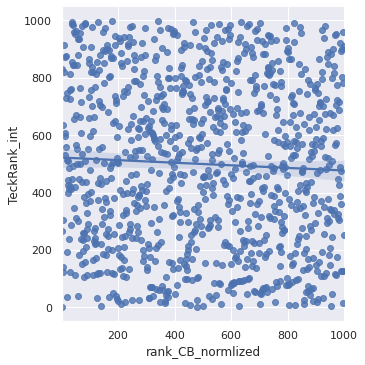

In [165]:
sns.lmplot(x="rank_CB_normlized", y="TeckRank_int", data=df_spearman)
plt.show()

In [166]:
df_spearman.corr(method='spearman')

TeckRank_int  rank_CB_normlized
TeckRank_int           1.000000          -0.045289
rank_CB_normlized     -0.045289           1.000000

#### Technologies

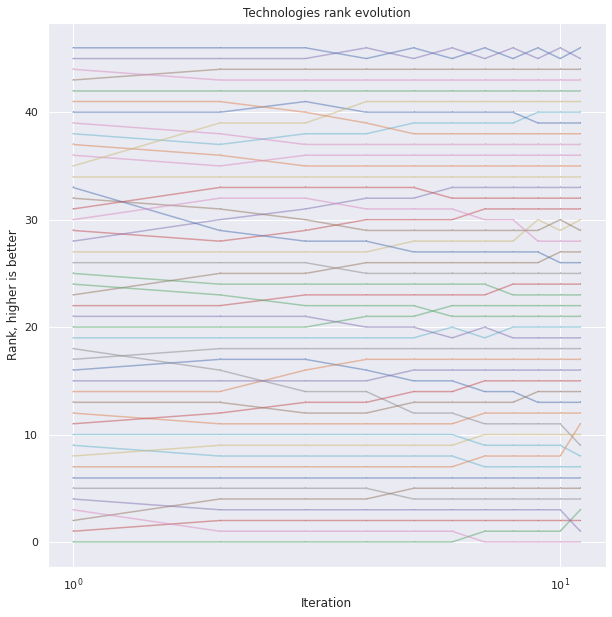

In [167]:
convergence_tech = find_convergence(M, alpha=0.5, beta=0.5, fit_or_ubiq='ubiquity', do_plot=True)
plt.savefig('plots/tech_rank_evolution.pdf')

In [168]:
convergence_tech['iteration']

12

In [169]:
df_final_tech, dict_tech = rank_df_class(convergence_tech, dict_tech)

In [170]:
df_final_tech

initial_position               final_configuration degree final_rank
0                 3            Navigation and Mapping      5     18.914
1                 4           Government and Military      6     21.823
2                 1                         Platforms      5     22.009
3                 0                 Natural Resources      7     22.101
4                 5                            Events      7     24.867
5                 2           Agriculture and Farming      8     28.346
6                 6                            Energy     15     35.844
7                 9                   Music and Audio     15     36.519
8                10              Clothing and Apparel     17     38.954
9                18  Messaging and Telecommunications     21     39.271
10                8                Travel and Tourism     15     39.988
11                7                    Sustainability     19     40.081
12               12                             Video     23     43.488
13               16                       Advertising     25     46.173
14               13                    Consumer Goods     22     46.862
15               11                            Sports     22     49.063
16               15                     Manufacturing     27     49.519
17               14                            Gaming     23     52.169
18               17            Content and Publishing     33     52.385
19               21                            Design     45     64.245
20               19                       Real Estate     32     64.594
21               24              Consumer Electronics     51     65.651
22               20           Community and Lifestyle     44      68.31
23               25           Administrative Services     49     70.769
24               22                 Food and Beverage     45     73.333
25               26                     Biotechnology     52     77.924
26               33           Artificial Intelligence     87     79.529
27               23                         Education     44     80.074
28               30              Privacy and Security     70     85.765
29               32                              Apps     88     87.243
30               27           Media and Entertainment     87     88.805
31               29               Sales and Marketing     86     89.246
32               31             Professional Services     79     96.441
33               28                    Transportation     82     103.22
34               34                            Mobile    124      108.2
35               37                          Hardware    134    110.591
36               36           Science and Engineering    139    112.644
37               39                          Payments    115    112.908
38               41                Data and Analytics    162    119.194
39               40                             Other    153    130.032
40               38             Commerce and Shopping    149    132.353
41               35                       Health Care    136    141.396
42               42                 Internet Services    227    151.676
43               44            Information Technology    232    152.377
44               43           Lending and Investments    163    171.201
45               45                Financial Services    307    223.362
46               46                          Software    500    227.538